# STOCK ANALYSIS NOTEBOOK: Reliance Industries Ltd.

In [38]:
import yfinance as yf
import pandas as pd
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mplfinance as mpf


In [39]:
# 1. Download Reliance Stock Data
ticker_symbol = "SBIN.NS"  # NSE: sbin
df = yf.download(ticker_symbol, start="2025-01-01", end="2025-08-01")

C:\Users\Hp\AppData\Local\Temp\ipykernel_3052\1010091717.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker_symbol, start="2025-01-01", end="2025-08-01")
[*********************100%***********************]  1 of 1 completed


In [40]:
# Preview data
if df is not None:
	print(df.head())
else:
	print("Data download failed. 'df' is None.")

Price            Close        High         Low        Open    Volume
Ticker         SBIN.NS     SBIN.NS     SBIN.NS     SBIN.NS   SBIN.NS
Date                                                                
2025-01-01  777.586426  782.929158  773.959246  779.890144   7273098
2025-01-02  785.428955  786.605346  771.508460  779.350986  11398319
2025-01-03  777.782471  793.565529  776.557076  785.428921  13336514
2025-01-06  761.117126  781.899771  757.931100  781.703756  11419367
2025-01-07  763.420837  768.420423  759.597582  764.499161   9669152


In [41]:
# 2. Basic Info
print("\nData Summary:")
print(df.describe())


Data Summary:
Price        Close        High         Low        Open        Volume
Ticker     SBIN.NS     SBIN.NS     SBIN.NS     SBIN.NS       SBIN.NS
count   146.000000  146.000000  146.000000  146.000000  1.460000e+02
mean    767.348773  774.807217  760.530648  768.253866  1.153953e+07
std      38.309321   38.005779   39.271731   38.555695  5.546298e+06
min     675.241455  683.672163  666.614647  676.564875  0.000000e+00
25%     737.479218  744.831601  728.742135  741.731363  7.717428e+06
50%     769.278229  783.100701  758.764341  772.072093  1.103611e+07
75%     798.759460  806.638448  793.512512  799.375000  1.359118e+07
max     831.700012  842.500000  826.349976  838.400024  3.724069e+07


In [42]:
# 3. Daily Returns Calculation
df['Daily Return'] = df[('Close', ticker_symbol)].pct_change()

In [43]:
# 4. Moving Averages
df['MA50'] = df[('Close', ticker_symbol)].rolling(window=50).mean()
df['MA200'] = df[('Close', ticker_symbol)].rolling(window=200).mean()

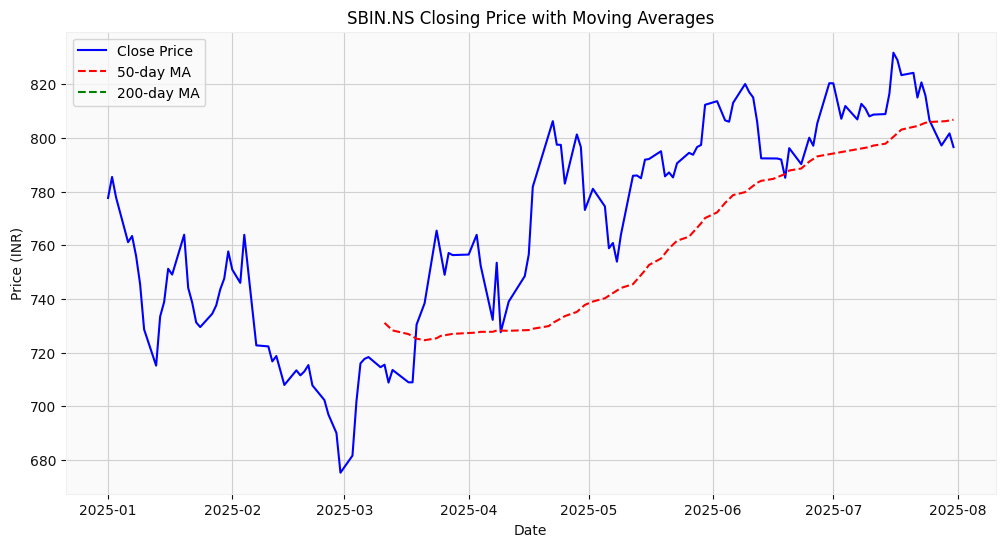

In [44]:
# 5. Plot Closing Price with Moving Averages
plt.figure(figsize=(12,6))
plt.plot(df[('Close', ticker_symbol)], label="Close Price", color='blue')
plt.plot(df[('MA50', )], label="50-day MA", color='red', linestyle="--")
plt.plot(df[('MA200', )], label="200-day MA", color='green', linestyle="--")
plt.title(f"{ticker_symbol} Closing Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.legend()
plt.grid(True)
plt.show()

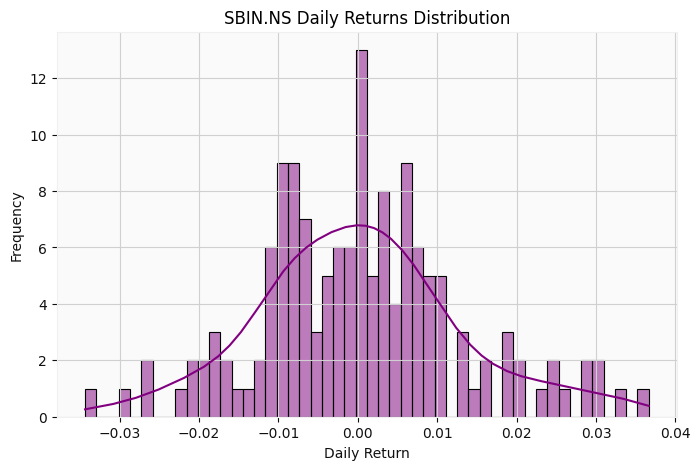

In [45]:
# 6. Daily Return Distribution
plt.figure(figsize=(8,5))
sns.histplot(df[('Daily Return', )].dropna(), bins=50, kde=True, color='purple')
plt.title(f"{ticker_symbol} Daily Returns Distribution")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

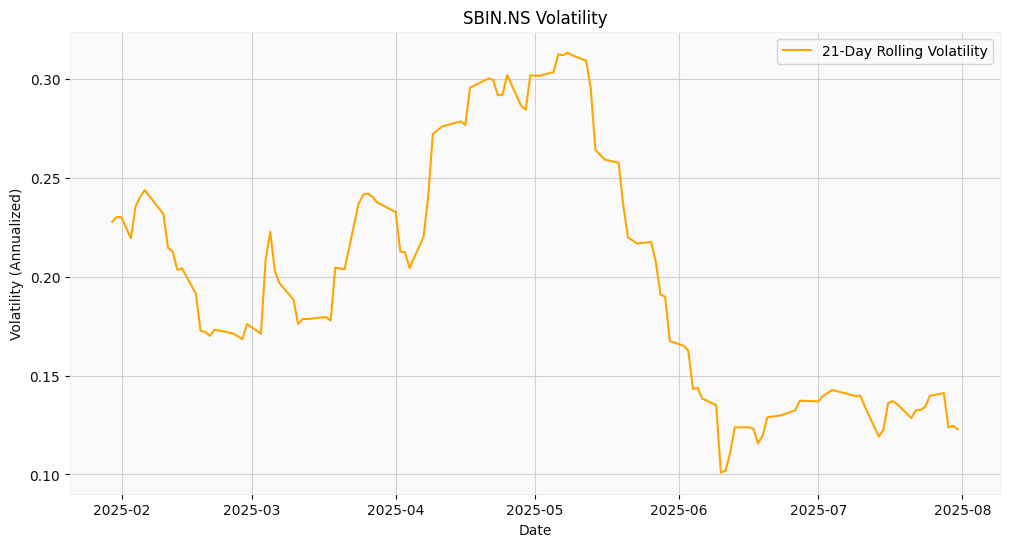

In [46]:
# 7. Volatility (Rolling Std Dev)
df['Volatility'] = df['Daily Return'].rolling(window=21).std() * (252**0.5)  # Annualized
plt.figure(figsize=(12,6))
plt.plot(df['Volatility'], label='21-Day Rolling Volatility', color='orange')
plt.title(f"{ticker_symbol} Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility (Annualized)")
plt.legend()
plt.grid(True)
plt.show()

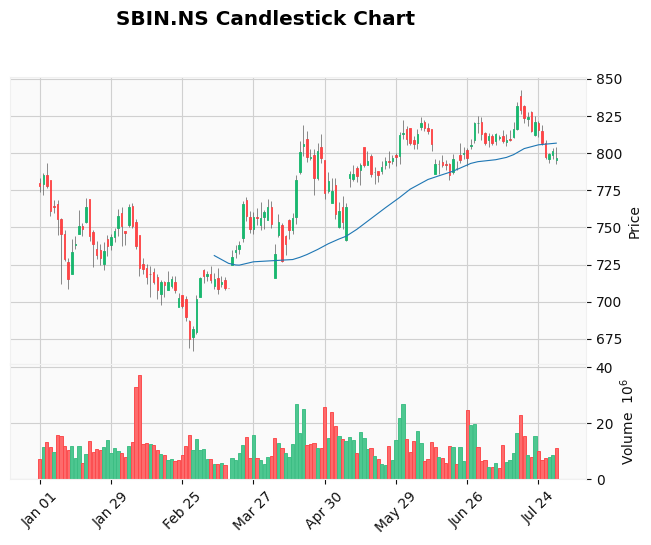

In [47]:
# 8. Candlestick Chart

# Flatten columns and rename for mplfinance
df_mpf = df.copy()
df_mpf.columns = [col[0] if isinstance(col, tuple) else col for col in df_mpf.columns]
df_mpf = df_mpf[['Open', 'High', 'Low', 'Close', 'Volume']]

mpf.plot(df_mpf, type='candle', volume=True, style='yahoo', title=f"{ticker_symbol} Candlestick Chart", mav=(50, 200))

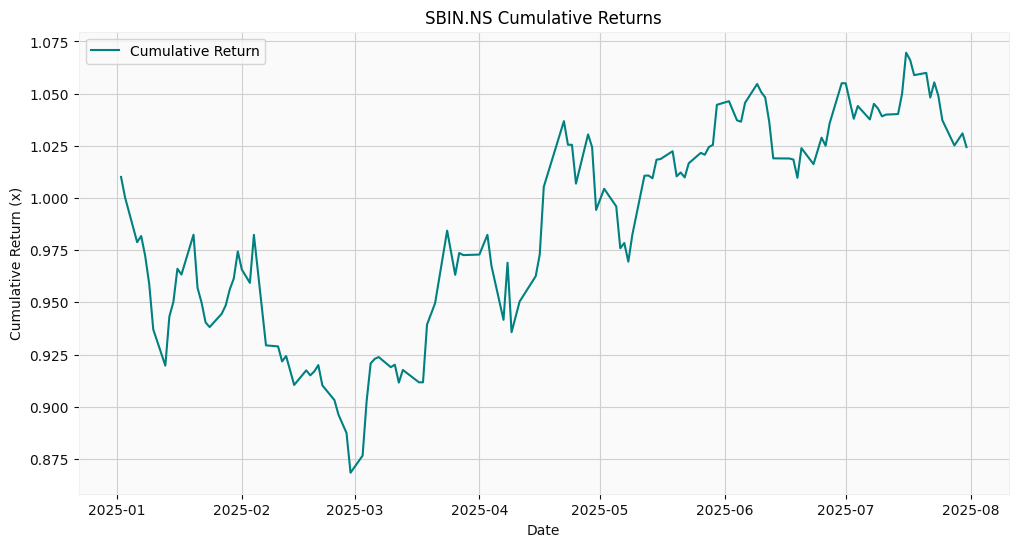

In [48]:
# 9. Cumulative Returns
df['Cumulative Return'] = (1 + df['Daily Return']).cumprod()
plt.figure(figsize=(12,6))
plt.plot(df['Cumulative Return'], label='Cumulative Return', color='teal')
plt.title(f"{ticker_symbol} Cumulative Returns")
plt.xlabel("Date")
plt.ylabel("Cumulative Return (x)")
plt.legend()
plt.grid(True)
plt.show()

In [49]:
# Save the processed data
df.to_csv(f"{ticker_symbol}_Stock_Analysis.csv")
print(f"\nAnalysis completed and saved as '{ticker_symbol}_Stock_Analysis.csv'")


Analysis completed and saved as 'SBIN.NS_Stock_Analysis.csv'


In [ ]:
# !pip install reportlab

from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Image
from reportlab.lib.pagesizes import letter
from reportlab.lib.styles import getSampleStyleSheet
import os

# Create PDF
pdf_filename = f"{ticker_symbol}_Stock_Report.pdf"
doc = SimpleDocTemplate(pdf_filename, pagesize=letter)
styles = getSampleStyleSheet()
elements = []

elements.append(Paragraph(f"{ticker_symbol} Stock Analysis Report", styles['Title']))
elements.append(Spacer(1, 12))

# Example stats
elements.append(Paragraph(f"Date Range: {df.index.min().date()} to {df.index.max().date()}", styles['Normal']))
elements.append(Paragraph(f"Total Data Points: {len(df)}", styles['Normal']))
elements.append(Paragraph(f"Mean Close Price: {df['Close'].mean():.2f}", styles['Normal']))
elements.append(Paragraph(f"Std Dev Close Price: {df['Close'].std():.2f}", styles['Normal']))
elements.append(Paragraph(f"Min Close Price: {df['Close'].min():.2f}", styles['Normal']))
elements.append(Paragraph(f"Max Close Price: {df['Close'].max():.2f}", styles['Normal']))
elements.append(Spacer(1, 12))

# Add example chart image
plt.figure(figsize=(8,4))
plt.plot(df['Close'])
plt.title("Closing Price")
plt.xlabel("Date")
plt.ylabel("Close Price")
chart_path = "close_chart.png"
plt.savefig(chart_path)
plt.close()

elements.append(Image(chart_path, width=400, height=200))
elements.append(Spacer(1, 12))

doc.build(elements)
print(f"PDF report saved as {pdf_filename}")

# Clean up chart image file
if os.path.exists(chart_path):

PDF report saved as Reliance_Stock_Report.pdf
